In [4]:
import contextily as ctx
import geopandas as gpd
from matplotlib import pyplot as plt


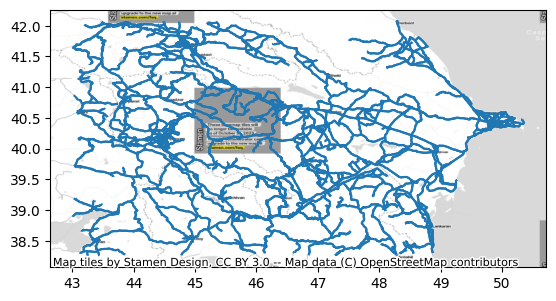

In [2]:
net = gpd.read_file('/home/surendra/Nextcloud/Results/RapidProj/networks/Armenia-ext/edges.geojson')
zones = gpd.read_file('/home/surendra/Nextcloud/Results/RapidProj/networks/Armenia-ext/aggrid_polygon.geojson')

a = net.plot()
plt.fig(figsize=(10,10), dpi=300, bbox_inches='tight')
ctx.add_basemap(a, source=ctx.providers.Stamen.TonerLite, crs=net.crs.to_string())


In [47]:
border

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,coords
18,144373535.0,Europe,Russia,RUS,1699876,"MULTIPOLYGON (((180.00000 71.51571, 180.00000 ...","(88.59732850428603, 59.40587000000008)"
107,82913906.0,Asia,Iran,IRN,453996,"POLYGON ((48.56797 29.92678, 48.01457 30.45246...","(54.118245053800806, 32.32603750256677)"
109,2957731.0,Asia,Armenia,ARM,13672,"POLYGON ((46.50572 38.77061, 46.14362 38.74120...","(45.063666574798575, 39.95249705663373)"
124,83429615.0,Asia,Turkey,TUR,761425,"MULTIPOLYGON (((44.77268 37.17044, 44.29345 37...","(35.45493090001703, 38.63352071792403)"
145,10023318.0,Asia,Azerbaijan,AZE,48047,"MULTIPOLYGON (((46.40495 41.86068, 46.68607 41...","(47.63524399042388, 40.038047390292924)"
146,3720382.0,Asia,Georgia,GEO,17477,"POLYGON ((39.95501 43.43500, 40.07696 43.55310...","(43.60200543890522, 42.29761033333508)"


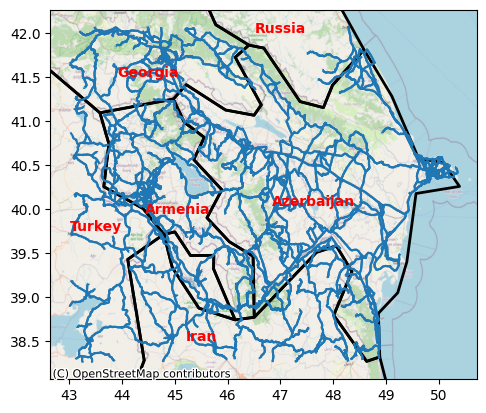

In [51]:
a = net.plot()

#make the figure bigger and increse dpi
from matplotlib import pyplot as plt
plt.figsize=(30,20)
plt.dpi=300
plt.bbox_inches='tight'
ctx.add_basemap(a, crs=net.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
# overlay the borders of the countries on top of the basemap
border = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#borders of armenia and azerbaijan - include partial polygons of both countries
border = border[(border.name == 'Armenia') | (border.name == 'Azerbaijan') | (border.name == 'Georgia') | (border.name == 'Iran') | (border.name == 'Turkey') | (border.name == 'Russia')]
# border should a line not fill
border.plot(ax=a, color='none', edgecolor='black', linewidth=2)
# add country names as labels - for bordering countries the label has to be near the border not in the center of the country and red in color for all labels
border['coords'] = border['geometry'].apply(lambda x: x.representative_point().coords[:])
# russia, georgia, turkey, iran - names are moved to border not at representative point
border['coords'] = [coords[0] for coords in border['coords']]
for idx, row in border.iterrows():
    if row['name'] == 'Armenia':
        plt.annotate(text=row['name'], xy=row['coords'],horizontalalignment='center', color='red', fontweight='bold')
    elif row['name'] == 'Azerbaijan':
        plt.annotate(text=row['name'], xy=row['coords'],horizontalalignment='center', color='red', fontweight='bold')
    elif row['name'] == 'Georgia':
        plt.annotate(text=row['name'], xy=[44.5, 41.5],horizontalalignment='center', color='red', fontweight='bold')
    elif row['name'] == 'Turkey':
        plt.annotate(text=row['name'], xy=[43.5, 39.75],horizontalalignment='center', color='red', fontweight='bold')
    elif row['name'] == 'Iran':
        plt.annotate(text=row['name'], xy=[45.5, 38.5],horizontalalignment='center', color='red', fontweight='bold')
    elif row['name'] == 'Russia':
        plt.annotate(text=row['name'], xy=[47,42],horizontalalignment='center', color='red', fontweight='bold')

# save figure
plt.savefig('/home/surendra/Documents/test.png', dpi=300, bbox_inches='tight')

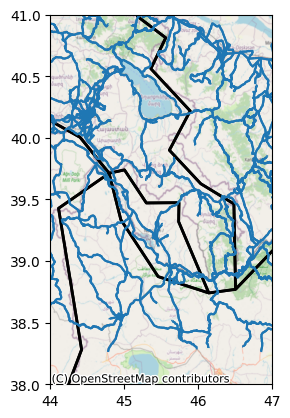

In [20]:
# zoomin to border of armenia and azerbaijan and save the figure add country names 
a = net.plot()
plt.figsize=(30,20)
plt.dpi=300
plt.bbox_inches='tight'
ctx.add_basemap(a, crs=net.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
border.plot(ax=a, color='none', edgecolor='black', linewidth=2)
plt.xlim(44, 47)
plt.ylim(38, 41)
plt.savefig('/home/surendra/Documents/arm-aze.png', dpi=300, bbox_inches='tight')

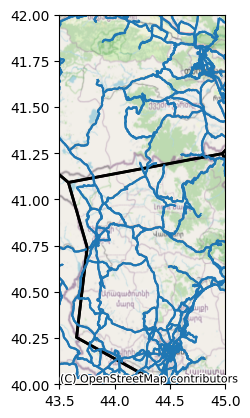

In [21]:
# zoomin to border of armenia and georgia and save the figure
a = net.plot()
plt.figsize=(30,20)
plt.dpi=300
plt.bbox_inches='tight'
ctx.add_basemap(a, crs=net.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
border.plot(ax=a, color='none', edgecolor='black', linewidth=2)
plt.xlim(43.5, 45)
plt.ylim(40, 42)
plt.savefig('/home/surendra/Documents/arm-geo.png', dpi=300, bbox_inches='tight')

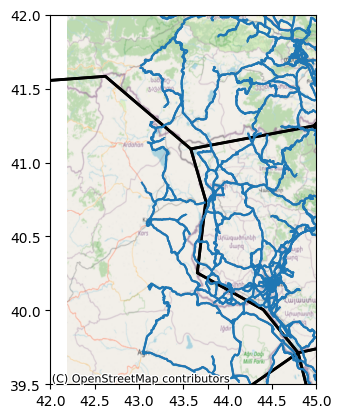

In [27]:
# zoomin to border of armenia and turkey and save the figure
a = net.plot()
plt.figsize=(30,20)
plt.dpi=300
plt.bbox_inches='tight'
ctx.add_basemap(a, crs=net.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
border.plot(ax=a, color='none', edgecolor='black', linewidth=2)
plt.xlim(42, 45)
plt.ylim(39.5, 42)
plt.savefig('/home/surendra/Documents/arm-tur.png', dpi=300, bbox_inches='tight')

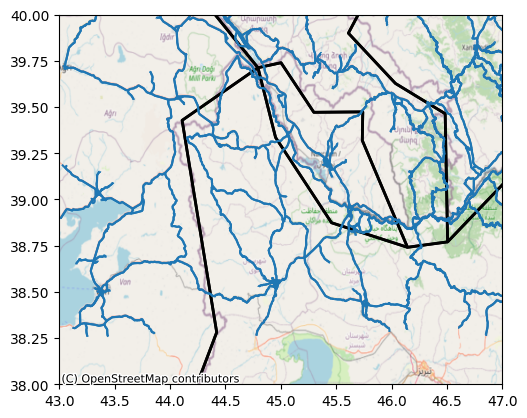

In [29]:
# zoomin to border of armenia and iran and save the figure
a = net.plot()
plt.figsize=(30,20)
plt.dpi=300
plt.bbox_inches='tight'
ctx.add_basemap(a, crs=net.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
border.plot(ax=a, color='none', edgecolor='black', linewidth=2)
plt.xlim(43, 47)
plt.ylim(38, 40)
plt.savefig('/home/surendra/Documents/arm-iran.png', dpi=300, bbox_inches='tight')

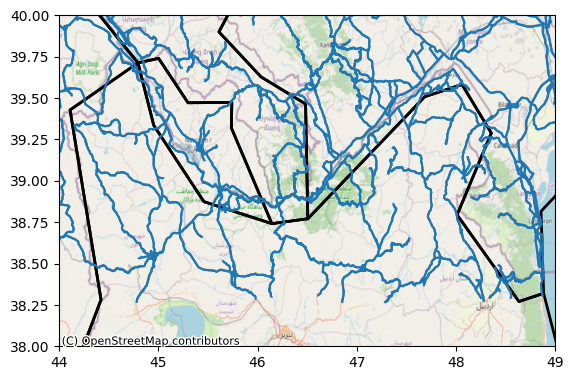

In [31]:
# zoomin to border of azarbaijan and iran and save the figure
a = net.plot()
plt.figsize=(30,20)
plt.dpi=300
plt.bbox_inches='tight'
ctx.add_basemap(a, crs=net.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
border.plot(ax=a, color='none', edgecolor='black', linewidth=2)
plt.xlim(44, 49)
plt.ylim(38, 40)
plt.savefig('/home/surendra/Documents/aze-iran.png', dpi=300, bbox_inches='tight')

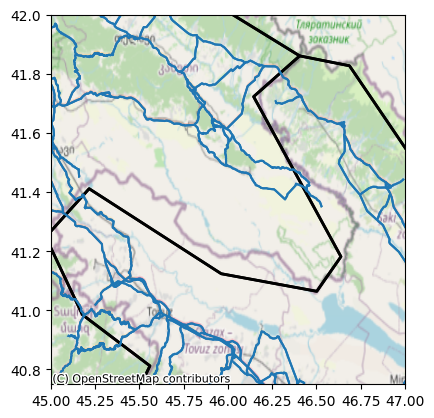

In [33]:
# zoomin to border of azarbaijan and georgia and save the figure
a = net.plot()
plt.figsize=(30,20)
plt.dpi=300
plt.bbox_inches='tight'
ctx.add_basemap(a, crs=net.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
border.plot(ax=a, color='none', edgecolor='black', linewidth=2)
plt.xlim(45, 47)
plt.ylim(40.75, 42)
plt.savefig('/home/surendra/Documents/aze-geo.png', dpi=300, bbox_inches='tight')

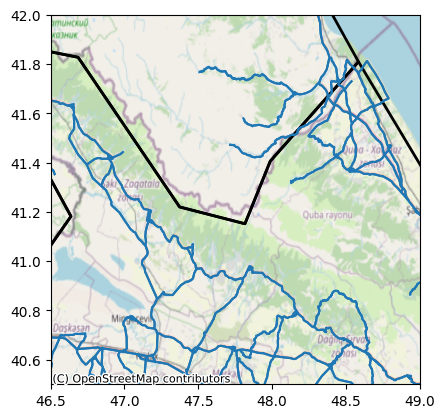

In [52]:
# zoomin to border of azarbaijan and russia and save the figure
a = net.plot()
plt.figsize=(30,20)
plt.dpi=300
plt.bbox_inches='tight'
ctx.add_basemap(a, crs=net.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
border.plot(ax=a, color='none', edgecolor='black', linewidth=2)
plt.xlim(46.5, 49)
plt.ylim(40.5, 42)
plt.savefig('/home/surendra/Documents/azarbaijan-russia.png', dpi=300, bbox_inches='tight')